In [1]:
import ttide as tt
import numpy as np
import matplotlib.pyplot as plt
from numpy import pi, cos, sin, fft
from datetime import datetime, date
from datetime import timedelta
from utide import solve, reconstruct
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import matplotlib.dates as mdates
import utide

%load_ext autoreload
%autoreload 2
import sys
import os
from pathlib import Path

sys.path.append(os.getcwd())

tide_path=os.path.abspath(os.path.curdir)+"/mydata/"
sys.path.append(str(tide_path)) # add the folder to the list of paths 

from mycode.specter import specter

# On Tides and Tidal Analysis

<img align="left" width="30%" style="padding-right:10px;" src="Images/Ccom.png">

## Adapted From Jim Irish (UNH OE), 2019
### Adapted by Semme J. Dijkstra 2020

# Jim Irish

## Thesis on Antarctic Tides

<img align="left" width="30%" style="padding-right:10px;" src="Images/Younger_jim.png">
<img align="left" width="30%" style="padding-right:10px;" src="Images/Bottom_gage_antarctic.png">
<img align="left" width="30%" style="padding-right:10px;" src="Images/jim_pointing.png">


# What are Tides?

- Tides are the regular rise and fall of the water surface and the associated currents that are driven by the gravitational attraction of the sun and moon.  
- Tides are the response of the oceans to the gravitational forcing.  They are the natural resonances of the ocean basins at tidal frequencies.  
- Tides have astronomical frequencies and have a fixed amplitude and phase relationship with the sun and the moon.

# What are not Tides?

- Tides are **not** the weather forced rise and fall of water level –  so called “storm tides.” They should be called “storm surge” as they are caused by the winds blowing water onto the coastal regioins.  
- Tides are **not** earthquake generated Tsunamis or “tidal waves.”  They are generated by geo-technical processes in the ocean or continental margins.  

# Why Study Tides?

- Tidal signals appear in most easurements made in the ocean
    - Temperature, salinity, dissolved oxygen, turbidity, currents, etc.
    - Bathymetric surveys are referenced to MLLW for practical use for shipping
- Tidal dissipation is a major mixing process and is a loss off energy from the earth moon system – earth rotation slowing at 0.0014 s/day, and moon moving away from earth at about 3 cm/yr.

# Traditional Measurement of Tides

- Tide Stilling Well to remove wave effects:
    - The stilling well is a long pipe with small hole in bottom to “filter out” waves by letting water in and out at a slow rate (really a low pass filter).  
    - Presently we use a parallel plate pressure port with the small hole at the static port in the middle of  one of the plates.   
    - This  small hole in the tube is a non-linear, low-pass filter which can be “pumped up  if excited by the right frequency waves - that is the water level will  rise above the real mean water level;
    - Bio-fouling can effect the low-pass filter ing process, e.g. e.g. an octopus living in well.

# Traditional Measurement of Tides

- Tide Gauge
    - A float in the well rises and falls with the water level.
    - Besides being buoyant it is heavy
    - A rope/ from the float goes up to the recorder and wraps around a wheel
    - This wheel turns a drum with a piece of paper on it.  As the drum turns with the tide the paper turns beneath a pen/pencil
    - The pen//pencil moves across the paper driven by a clock.  This traces out the tidal signal on the paper.

# Traditional Tide Gauge

<img align="left" with="70%" style="padding-right:10px;" src="Images/traditional_gauge.png">
From NOAA photo library
Baranof Island, Alaska 1924 
Installed on top of stilling well

# Old vs New

<img align="left" width="70%" style="padding-right:10px;" src="Images/old_vs_new.PNG">
https://oceanservice.noaa.gov/facts/tide-gauge.html

# Eastport, Maine

<img align="left" width="70%" style="padding-right:10px;" src="Images/eastport_me.png">

  <br><br> Some of the data that we will be processing was collected near the border with Canada in Eastport, ME

# Fort point, New Castle, NH

<img align="left" width="40%" style="padding-right:10px;" src="Images/fort_point_1.png">
<img align="left" width="40%" style="padding-right:10px;" src="Images/fort_point_2.png">

  <br><br> This gauge will be decommissioned in 2020

# Jackson Lab, Durham, NH

<img align="left" width="70%" style="padding-right:10px;" src="Images/jackson_lab.png">

  <br><br> This gauge was commissioned as part of CCOM/JHCs educational program

# Bottom Pressure Measurement

In the case where the ocean is in approximate static equilibrium, the vertical equation of motion becomes the hydrostatic equation, and this can be integrated from the top of the atmosphere ($\infty$) to the bottom of the ocean ($-h$) to obtain the pressure observed by the instrument deployed there. 

$$P_{-h}(t)=\int_{-h}^{\infty} \rho(z,t) \cdot g \cdot dz$$

We can break this up into several pieces as follows:

$$P_{-h}(t)=\int_{\eta}^{\infty} \rho_{atm}(z,t) \cdot g \cdot dz + 
            \int_{0}^{\eta} \rho_{0}(z,t) \cdot g \cdot dz + 
            \int_{-h}^{0} \rho_{avg}(z,t) \cdot g \cdot dz +
            \int_{-h}^{0} \rho'(z,t) \cdot g \cdot dz$$
            
The integral from the top of the atmosphere ($z=\infty$) to the sea surface ($z=\eta$) is just the atmospheric pressure, $P_{atm}$. 

The sea surface is generally not smooth, but consists of waves whose elevation we describe by $\eta$ as a function of time.  Thus the next term is the integral from the sea surface ($z=\eta$) to the mean sea level ($z=0$).  This then is a pressure due to the surface waves that we approximate as the surface density, $\rho_0$, times the elevation $\eta$.  However, remember that surface wave effects decrease with depth as $e^{-k\cdot z}$ where $k$ is the surface wave wavenumber ($k = 2\pi/\lambda$) and $z$ the depth.

The next term involves the integral from the mean sea level ($z=0$) to the sea floor ($z=-h$).  We shall break this further up into terms depending on the density.  The first is the average density, $\rho_{avg}$, times the mean depth $-h$ and is just the mean hydrostatic pressure seen by the bottom pressure sensor.

The final term is the deviation from the mean density where
			 $$\rho(z) = \rho_{avg} + \rho’(z,t)$$
             
where the perturbation density $\rho’$ contains the effects of internal density changes on the bottom pressure. 



# Bottom Pressure Measurement

Then we can write the pressure our bottom instrument sees as the contribution of these terms:

$$P_{-h}(t)=P_{atm}(t)+\rho_0(t)\cdot g \cdot\eta (t) \rho_{avg}\cdot g \cdot h + \int_{-h}^{0} \rho'(z,t) \cdot g \cdot dz$$
            
So we see the signal we see at the bottom is due to: 
- the atmospheric pressure
- the contribution due to the waves and other deviations of the sea level from its mean position
- the average hydrostatic pressure due to the depth of the water
- the contribution due to internal density changes.  Which in shallow water situations is small


# Bottom Pressure Measurement

Solving for the time varying sea level variation, $\eta(t)$, as a function of the time varying density:

$$\eta(t) = \frac{P_{-h}(t) - P_{atm}(t)}{\rho_0(t)\cdot g} - constant$$
            
The term in curly brackets is the differential pressure that the Bubbler tide gauge at Jackson Lab measures.  This can also be calculated from an absolute pressure sensor and a nearby atmospheric pressure sensor

The correction $\rho(t)\cdot g$ is a time varying term that changes with time and should be measured.


# $\rho(t)\cdot g$ Correction from MicroCAT at Jackson Estuarine Lab

<img align="left" width="70%" style="padding-right:10px;" src="Images/density_gravity_corrn.png">

# Sine Wave

A sine wave is a continuous smooth periodic oscillation. Sine waves occur in tidal motion due to the periodic motion of the Earth and astronomical bodies. In tides we tend to use the $1/2 \pi$ complement to the sine, known as the cosine

$$\eta(t) = A\cdot cos(f\cdot t + \theta)$$


where:

- A: amplitude
- f: frequency or the cycles per second
- $\theta$:  phase of cycle at $t=0$

# Line Spectra

In the top plot generated by the code cell below you see a 1024 point sine wave signal with a 43 point cycle. The power spectrum of that signal is given by the bottom plot. In this case you might expect a single peak at exactly $f=1/43$, however this is not the case, which is due to the limitations of the fft algorithm that relies on the system being continuous.

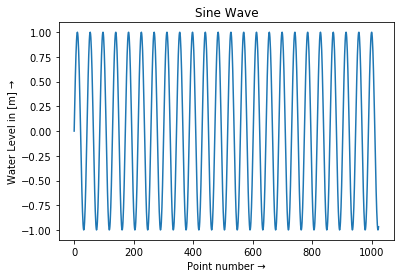

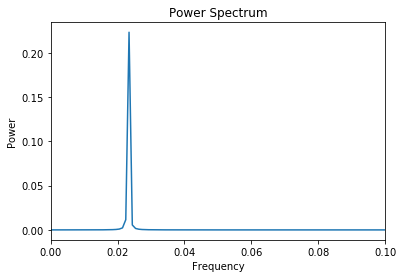

In [2]:
plt.figure();
n = 1024
s = int(n/2)
t = np.arange(n)
f = 1/43
A = 1
eta = A*sin(2*pi*f*t)  # Create a sinusoid
plt.plot(eta)
plt.title('Sine Wave')
plt.ylabel('Water Level in [m] →') 
plt.xlabel('Point number →') 
plt.show()
plt.figure();         # Show the sinusoid
Fk = fft.fft(eta)/n   # The FFT of the signal
nu = fft.fftfreq(n,1) # The natural frequencies in the spectrum
plt.plot(nu[0:s],np.absolute(Fk[0:s])**2) # Plot the power spectrum
plt.title('Power Spectrum')
plt.ylabel('Power')
plt.xlabel('Frequency')
plt.xlim(0,0.1)
plt.show()


# Astronomical Frequencies

The tide generating forces are cyclical forces due to gravity acceleration of various astronomical processes. For tidal modeling there are 6 associated frequencies of particular importance 

$f_1$ = 1 cycle per lunar day = earth rotation (high moon to high moon) = 24.84 hours = 14.4921º/hr<br>
$f_2$ = 1 cycle per month = moon around earth = 27.3216 mean solar days = 0.544º/hr<br>
$f_3$ = 1 cycle per year = earth around sun = 365.2422 mean solar days = 0.0411º/hr<br>
$f_4$ = 1 cycle per 8.85 Julian years (365.25 days) = lunar perigee<br>
$f_5$ = 1 cycle per 18.61 Julian years = regression of the nodes<br>
$f_6$ = 1 cycle per 20,900 years = solar perigee<br>

# Tidal Frequencies

To determine the tidal elevation $\eta(t)$ we may use the expression:

$$\eta(t) = \Sigma_k\cdot A_k\cdot cos(f_k\cdot t + \theta_k)$$


where:

- $A_k$: amplitude of tidal constituent $k$
- $f_k$: frequency of tidal constituent $k$
- $\theta_k$:  phase of tidal constituent $k$

The tidal frequencies $f_k$ are combinations of the basic astronomical frequencies

# Darwin Symbol

Darwin symbols are shortcuts to identifying a tidal frequencies e.g., $M1, O1, K1, N2, M2, S2, M4$.

The principle tidal frequencies are identified by their Darwin Symbol which is related to the daily, monthly and yearly tides.

The 8 and 18 year tides are  handled separately as will be discussed later. 

The number in a Darwin Symbol represents the species, or the number of cycles per day of that constituent.  

# Doodson Number

- Tidal frequencies are made up of sums and differences of the 6 basic astronomical frequencies
- The Doodson number says what that sum is
- The Doodson number, k, is a 6 digit vector that is multiplied by the 6 astronomical frequencies, fk
- As an example, the principle lunar tide, with a Darwin symbol M2, has a Doodson number of k=200000.  The principle solar tide, S2, has Doodson number of  22-2000

$$M2 = 2*f_1 + 0*f_2 + 0*f_3 + 0*f_4 + 0*f_5 + 0*f_6$$

$$S2 = 2*f_1 + 2*f_2 - 2*f_3 + 0*f_4 + 0*f_5 + 0*f_6$$


# A Word on the Tidal Phases

In the discussion of the determination of the tidal frequencies from the tidal equation the phase $\theta_k$ and amplitude $A_k$ at each constituent were used. You have to use care with the phase term $\theta_k$ as it is dependent on the time reference frame used

- $G$ = Greenwich Epoch = phase lag of the observed tide behind the passage of the sun or moon over Greenwich Meridian with time kept in UTC.  
- $g$ = same as G but uses local time rather than UTC.
- $\kappa$ = local Epoch = phase lag of the observed tide behind the passage of the sun or moon over the local meridian.
    - Where $G = k + s\cdot$*local West longitude*<br>
      $s$ = species with 0 for long period, 1 for diurnal, 2 for semi-diurnal, etc.  
      
**For plotting the spatial structure of the tide, you want the Greenwich Epoch (G) rather than the local epoch!**



# Major Tidal Constituents

In the table below you will find the major tidal constituents explaining the large majority of the tidal signals:


<img align="left" width="70%" style="padding-right:10px;" src="Images/major_tidal_constituents.png">

# Spectrum of Tidal Constituents (AKA Tide Lines)

<img align="left" width="70%" style="padding-right:10px;" src="Images/Hartman-and-Wenzel_tidal_spectrum.png">

Source: Hartmann T. and Wenzel H.G., 1995, The HW95 tidal potential
catalogue. Geophys. Res. Lett, 22, 3553–3556.

# Additional Considerations

## Tides of the solid earth.  

The surface of the earth rises and falls up to 30 cm due to the forcing of the sun and moon.  The earth tides are generally in equilibrium with the tidal potential. The Love numbers describe the elasticity of the earth in response to the gravitational forcing.  

## Tides of the solid moon

seismometers on the moon show that there are “moon” tides due to the gravitational attraction of the sun.

# What are Tidal Heights Referenced to?

When looking at the tides of the waters on the earth we need to take account of the land as a “moving” reference point – it isn’t fixed in space.

Tide gauges are surveyed in relative to standard geodetic markers called bench marks. These are fixed to the earth and in the USA their height is given with respect to `NAVD88` the North American Vertical Datum.

However there are some problems with this, consider the case of California, the continental shelf there experiences loading due to tidal flow onto the shelf with the rise in the tide. The resulting strain in the earth (bending of the coastal regions) is easily observed with laser strain gauges. This means that the entire NAVD88 datum, defined at the benchmarks through leveling observations, oscillates as a function of the tidal loading!

Sources of relative movement of benchmarks:
- tidal loading
- glacial rebound
- glacial tilting (reverse effect of glacial rebound, occurs in southern US)
- use of resources such as oil and water
    - causes further sinking
    - Louisiana loses about a football field/day in territory
- Sea floor spreading and other tectonic movement
    - Neah Bay, WA is rising because of the Juan de Fuca plate subducting it
    - Alaska is rising at 10cm/year making it less accessible to large vessels, such as cruise ships
- Sea level change
    - primarily a function of change in seawater density

# Tidal Analysis Methods

## 1 Harmonic Method – NOAA/NOS
Original Method 
– Fourier Transform at tidal frequencies 
– Requires 1 month or 1 year records with no gaps

## 2 Response Method
    Walter Munk (IGPP SIO) & David Carwtright (National Institute of Oceanography, UK)

- Separates Astronomy and Oceanography
- Uses additional information on ocean to get improved prediction
- Can be used with any length record

## 3 Least Squares – t_tide and UTide
    Fits predicted tide to observed in least squares sense – Mike Forman 

- Records may have gaps
- Any length record, but longer than 1 year break up.  

### Relative Performance
For long, “clean” records, the results from these three methods are statistically the same. E.g. 1 year record on Stellwagen Bank

# Analysis Methods 1 Harmonic Method – NOAA/NOS

- First tidal analysis was a Fourier transform at tidal frequencies given by astronomy - done by hand. No need for a full transform. 
- The transform gives phase relative to the record start and it needs to be adjusted relative to astronomy.     
- NOAA normally uses 1 month or 1 year record lengths to get around windowing problems.

## Nodal Correction

Analysis on 1 year or less of data can not resolve 8 and 18 year effects. 
Therefore, use Darwin Symbols like M2 to “name” the frequency, and adjust the amplitude and phase of a one year record for the 8 and 18 yr tides by:
      $$\eta(t) = \Sigma a_k\cdot A_k\cdot cos(f_k t + \theta_k+ b_k)$$
      
Where $ak$ and $bk$ are “nodal” corrections in amplitude and phase for a record < 1 year at the midpoint of the record.

- Analysis is by Fourier transform at the tidal frequency.  The frequency is determined quite accurately by astronomy – M2 = 1.93227361 Cycles Per Day (`cpd`)
- Analysis is done on the largest of the constituents as determined by equilibrium theory (e.g. M2 = 0.90812, and O1 = 0.37689).
- NOAA uses 25 constituents (including higher harmonics e.g. M4, M6) to make a normal analysis. (Other routines use up to 49 constituents.)   
- For short records (e.g. 1 month), 5 constituents are analyzed and the rest of the constituents (up to 49) are inferred from equilibrium theory. 
- The analysis selects the part of the signal which is in constant amplitude and phase relation with the observed at a constituent's frequency.

## Nodal Correction

The crux of a tidal analysis is how to analyze for the tidal part of the water level signal without including “noise.”
There is “noise” in all geophysical data, so any analysis must consider how to separate the tidal signal from the background noise i.e., how to separate the Signal to Noise Ratio (`SNR`).

For a good prediction, you do not want to predict all the variance (non tidal energy) in the record, but just the tidal part. As an example of harmonic analysis, take a bottom pressure record.

<img align="left" width="70%" style="padding-right:10px;" src="Images/fort_point_nh.png">

Spectrum of water level at Fort Point in New Castle, NH

# Example:  Bottom Mounted Gauges on Georges Bank


<img align="left" width="70%" style="padding-right:10px;" src="Images/EGG_BLM_Bottom_pressure.png">

Locations of 9 gauges mounted on the Seafloor on Georges Bank (East of Cape Cod, MA)

# Pressure Records from Georges Bank Experiment

<img align="left" width="70%" style="padding-right:10px;" src="Images/EGG_BLM_Bottom_pressure2.png">

# Georges Banks Results

<img align="left" width="70%" style="padding-right:10px;" src="Images/Georges_results_1.png">
<img align="left" width="70%" style="padding-right:10px;" src="Images/Georges_results_2.png">
<img align="left" width="70%" style="padding-right:10px;" src="Images/Georges_results_f.png">


# Prediction

Once you have analyzed a record for the harmonic constants (e.g., M2  0.389 m  006.1º) you can predict the tide for any other time for that place. It is important that you understand that classical tidal analysis and prediction are only valid for only one point in space

Before the advent of modern digital computers prediction was done using a tide generating machine. Tide generating machines are mechanical devices.

<img align="left" width="70%" style="padding-right:10px;" src="Images/tide_prediction_machine.png">
<br><br>
Tide Machine: Amplitude is set by length of arm (K), Phase is set by the position of the arm and the pulleys sum the results, finally the pen marks the predicted tide from the various constituents on paper.


in WW II there was one machine in England and one NOAA headquarters in Maryland. These machines were hidden during WWII as they were of key importance to supplying information for the Normandy invasion, and others. The Germans had their own tidal predicting machine.  

The tide predicting machines were complex mechanical systems where the amplitude and phase for each constituent were set and machine summed the results for a prediction.  


# NOAA Mechanical Tide Prediction

Once you have analyzed a record for the harmonic constants (e.g., M2  0.389 m  006.1º) you can predict the tide for any other time for that place. It is important that you understand that classical tidal analysis and prediction are only valid for only one point in space

Before the advent of modern digital computers prediction was done using a tide generating machine. Tide generating machines are mechanical devices.

<img align="left" width="50%" style="padding-right:10px;" src="Images/noaa_tp_machine_1.png">
<img align="left" width="50%" style="padding-right:10px;" src="Images/noaa_tp_machine_2.png">
<img align="left" width="50%" style="padding-right:10px;" src="Images/noaa_tp_machine_3.png">
<img align="left" width="50%" style="padding-right:10px;" src="Images/noaa_tp_machine_4.png">

<br><br><br>

This machine was designed by Rollin A. Harris and E.G. Fischer and constructed in the instrument shop of the U.S. Coast and Geodetic Survey in 1910 and replaced the earlier Ferrel Machine in 1912. 

The machine is about 11 feet long, 2 feet wide, and 6 feet high, and weighs approximately 2,500 pounds. The principal features are: 
- the supporting framework
- a system of gearing by means of which shafts representing the different constituents are made to rotate with angular speeds proportional to the actual speeds of the constituents 
- a system of cranks and sliding frames for obtaining harmonic motion
- summation chains connecting the individual constituents elements, by means of which the sums of the harmonic terms are transmitted to the recording devices
- a system of dials and pointers for indicating in a convenient manner the height of the tide for successive instants of time and also the time of the high and low waters; 
- a tide curve or graphic representation of the tide automatically constructed by the machine. 

The machine was designed to take account of the following 37 constituents: 

$J1, K1, K2, L2, M1, M2, M3, M4, M6, M8, N2, 2N2, O1, OO1, P1, Q1, 2Q1, R2, S1, S2, S4, S6, T2, lambda2, µ2, nu2, rho1, MK, 2MK, MN, MS, 2SM, Mf, MSf, Mm, Sa, Ssa$.



# Analysis Method 2 Response Method


## THIS APPEARS TO BE MISSING FROM JIM'S NOTES

# Analysis Method 3 Least Squares T_Tide and U_tide


t_tide and the newer u_tide constitute algorithms for a least squares fitting of observations to tides to get the standard tidal constituents. T_tide originated as Matlab code derived from software by Mike Foreman of Pat Bays Labs, IOS, Canada. T_Tide and U_tide are available as GIT repositories. Here we will use T_Tide to stay consitent with labs from previous years

Following is an example of using t_tide on a bottom pressure record from the UNH-OOA site. 

<img align="left" width="50%" style="padding-right:10px;" src="Images/bottom_pressure_deploy_18.png ">




## Fortnightly Tide – not “real” tide

Consider two sine waves
- Take two frequencies:
    - M2 = 1.93227361 cpd
    - S2 = 2.00000000 cpd
- The difference is 0.06772639 cpd
- The period of 14.76 days (a fortnight)

Therefore, the fortnightly modulation of the tides we see is really the beating of the M2 and S2 tides (the tides due to the sun and the moon). 


## Bottom Pressure Record

- Pressure is measured by sensor in the bottom Seacat (SBE-16Plus) about 1.5 meters above the bottom.  

- Statistics of the record are:
    - Maximum = 55.36 dbars
    - Minimum = 50.10 dbars
    - Mean = 52.4929 dbars
    - Variance = 0.9172 dbars² - (energy in record) 
        - for a sinewave is $Variance = \frac{1}{2}A^2$ or $Variance = \Sigma(value-mean)^2$
- Where 1 dbar is about 1 m of sea level

<img align="left" width="100%" style="padding-right:10px;" src="Images/t_tide_results.png">


<img align="left" width="100%" style="padding-right:10px;" src="Images/Georges_Bank_S_Dep8.png">
<img align="left" width="100%" style="padding-right:10px;" src="Images/Fort_point_Jackson_Map.png">
<img align="left" width="100%" style="padding-right:10px;" src="Images/M_2_T_Amp_Piscataqua.png">
<img align="left" width="100%" style="padding-right:10px;" src="Images/M_2_Tidal_Greenwich_Phase.png">





# Assignment: Analysis of Two Tide Gauge Records

## 0 Getting Fort Point Data from the WEB

The general procedure would be to:

Open a browser, and search for “NOAA Tides and Currents
- Choose NH On the map
- Click on the pin for Portsmouth

The screen shows the latest observations and predictions (if the gauge is not frozen)
- Click on the `More Data` drop down menu and select `Water Levels`

- Pick the start and end times on the left
- Then in the middle, set the units to `Metric` and set the time zone to `GMT`
- Below that select the Datum e.g., MSL or NAVD
- On the right select 6 min. or 1 hour samples as desired
- Click the `DATA ONLY` button
The program will then display the data selected.  

Copy this data and paste into Notepad, Excel, etc. and look for missing times and observations and fill with time and NaN. For analysis the time must be continuous, and have no gaps in time! 

For this lab, we will not get data from the site, but some data from 2010 collected as part of an observational program in Great Bay.  That data goes from 1 September 2010  to early January 2011 when the tide gauge froze.

The data is in the `mydata` folder for this course - in the code cell below the folder is added to the path


## 1 Read in the Fort Point Data

Read and plot the Fort Point Data



In [3]:
# 1.0 Read the file 
# Open, read and close the file
 
wl_file = open(str(tide_path)+'/fortPoint.txt')
wl_content = wl_file.read()
wl_file.close()
        
# 1.1 Parse the contents

# Split the file into lines (Each line representing a record)

wl_lines = wl_content.splitlines()

# Determine the number of records

nr_records = len(wl_lines) # Determine the number of lines (records) in the file

# Allocate memory for the water levels (ttide uses numpy arrays)
wl_fp = np.zeros(nr_records) #  nr_records x 1 array to hold the water levels from Fort Point

# Create a list to hold the associated times

t_fp = []

for idx, wl_record in enumerate( wl_lines):
    
    # Tokenize the record
    obs = wl_record.split()
    
    # Add the time to the t_fp list 
    
    t_fp.append(datetime(int(obs[1][0:4]),int(obs[1][4:6]),int(obs[1][6:8]),int(obs[2]), 0, 0))
    
    # Add the water level to the array wl_fp
    wl_fp[idx]=float(obs[4])
    
# Set the latitude of the Fort Point Gauge (in degrees!)

lat_fp = 43.07



## 1.0 Open and Read Data from Fort Point

In the code cell above open the text file `fortPoint.txt` contained in your `mydata` folder and read the contents into a list variable called `wl_content`. 


## 1.1 Parse the data

Create an empty nx2 array called `wl_fp` to hold the water level data, the first column will hold the time in seconds since the first record for each record

Each successive element of the list should contain a line (record) of the data file. In a for loop go through all the records and add the last field to the list `wl_fp`. Assign the number of records to the variable `nr_records`

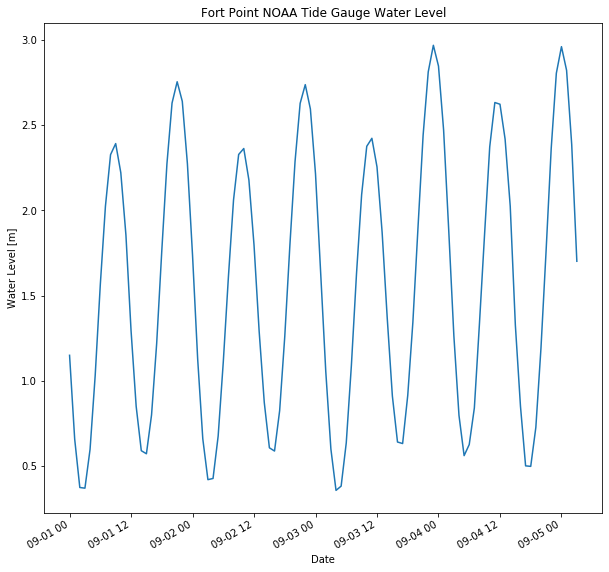

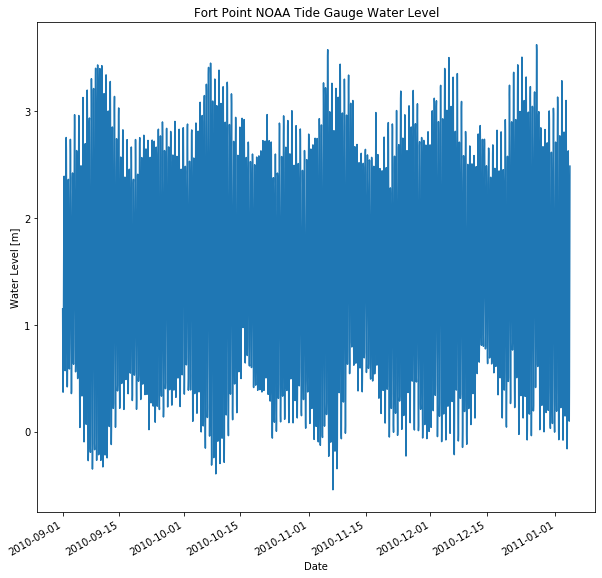

In [4]:
# 1.2 Plot the Fort Point Data 

# Plot the first 100 records
plt.figure(figsize=(10, 10))
plt.plot(t_fp[:100],wl_fp[:100])
plt.title('Fort Point NOAA Tide Gauge Water Level')
plt.ylabel('Water Level [m]')
plt.xlabel('Date')
plt.gcf().autofmt_xdate() # Make the x-label more readable

# Plot the entire data set
plt.figure(figsize=(10, 10))
plt.plot(t_fp,wl_fp)
plt.title('Fort Point NOAA Tide Gauge Water Level')
plt.ylabel('Water Level [m]')
plt.xlabel('Date')
plt.gcf().autofmt_xdate() # Make the x-label more readable

## 1.2.0 Plot 100 Records of the Fort Point Data

In the code cell above complete the code to plot the first hundred data records. Make it so that the title reads `Fort Point NOAA Tide Gauge Water Level`, the y-axis label reads `Water Level [m]` and the x-axis label reads `Date`.


## 1.2.1 Plot All Records of the Fort Point Data

Create a plot with the same properties as the one from step 1.2.0, but now showing all the records for the Fort Point data file

In [39]:
time_fp = mdates.date2num(t_fp)

c_fp = utide.solve(time_fp,wl_fp,lat=lat_fp,method='ols',conf_int='MC',trend=False)

print('')
print(f"{'Darwin':>9}"f"{'freq':>10}",f"{'Amp':>9}",f"{'95ci%':>9}",f"{'phase':>9}",f"{'95ci%':>9}",f"{'SNR':>9}")
for idx, const in enumerate( c_fp.name):
    print("%9s% 10.4f% 10.4f% 10.4f% 10.2f% 10.2f% 10.2f" \
          %(const, c_fp.aux.frq[idx], c_fp.A[idx],c_fp.A_ci[idx],c_fp.g[idx],c_fp.g_ci[idx],c_fp.diagn['SNR'][idx]))


solve: matrix prep ... solution ... diagnostics ... done.

   Darwin      freq       Amp     95ci%     phase     95ci%       SNR
       M2    0.0805    1.2938    0.0100    105.91      0.35  64121.27
       N2    0.0790    0.3037    0.0090     68.81      1.65   4344.37
       S2    0.0833    0.1938    0.0099    131.41      2.84   1478.17
       K1    0.0418    0.1435    0.0057    196.10      2.73   2473.06
       O1    0.0387    0.1086    0.0057    182.94      2.89   1374.30
       L2    0.0820    0.0884    0.0085    162.68      5.80    418.01
      MSF    0.0028    0.0293    0.0265    122.72     62.93      4.69
      MU2    0.0777    0.0205    0.0086    122.99     25.46     21.81
       MM    0.0015    0.0189    0.0222     92.61     89.05      2.78
       M4    0.1610    0.0160    0.0009    325.97      2.89   1171.09
       Q1    0.0372    0.0154    0.0059    146.30     21.71     26.55
       J1    0.0433    0.0113    0.0061    213.53     29.78     13.18
      NO1    0.0403    0.0107  

## Analyze the tide using UTide

I have already installed the t_tide library for you. At the top of this notebook it is imported as `tt`. We will use ttide to  do the tidal analysis for you

In [40]:
# Predict the tides using the outcome of the tidal analysis
tide_fp = utide.reconstruct(time_fp, c_fp)

prep/calcs ... done.


## Predict the Tide Using UTide

In the code cell above 

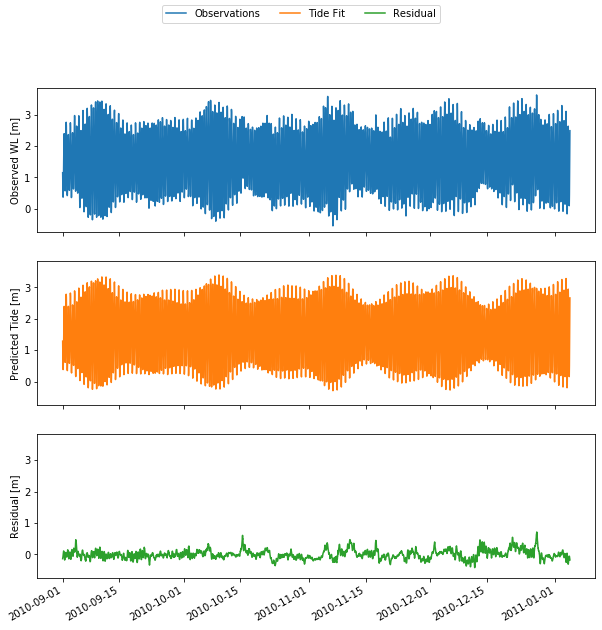

In [41]:


fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, sharey=True, sharex=True,figsize=(10, 10))

ax0.plot(t_fp, wl_fp, label=u'Observations', color='C0')
ax0.set_ylabel('Observed WL [m]')
ax1.plot(t_fp, tide_fp.h, label=u'Tide Fit', color='C1')
ax1.set_ylabel('Predicted Tide [m]')
ax2.plot(t_fp, wl_fp - tide_fp.h, label=u'Residual', color='C2')
ax2.set_ylabel('Residual [m]')
ax2.xaxis_date()
fig.legend(ncol=3, loc='upper center')
fig.autofmt_xdate()

## Compare the Predicted and Residual Tides

Use the code cell above to plot to create a set of 3 subplots positioned above eachother using a single set of x-axis labels. Label the axis 

In [42]:
# 1.0 Read the file 
# Open, read and close the file
 
wl_file = open(str(tide_path)+'/JacksonLab.txt')
wl_content = wl_file.read()
wl_file.close()
        
# 1.1 Parse the contents

# Split the file into lines (Each line representing a record)

wl_lines = wl_content.splitlines()

# Determine the number of records

nr_records = len(wl_lines) # Determine the number of lines (records) in the file

# Allocate memory for the water levels (ttide uses numpy arrays)
wl_jl = np.zeros(nr_records - 1) #  nr_records x 1 array to hold the water levels from Fort Point

# Create a list to hold the associated times

t_jl = []

for idx, wl_record in enumerate( wl_lines[1:]):
    
    # Tokenize the record
    obs = wl_record.split(',')
    
    # Add the time to the t_jl list 
    
    t_jl.append(datetime(year = int(obs[0][0:4]),month = int(obs[0][4:6]),day = int(obs[0][6:8])))
    t_jl[idx]+=timedelta(seconds=float(obs[1]))
    
    # Add the water level to the array wl_fp
    wl_jl[idx]=float(obs[2])
    
# Set the latitude of the Jackson Lab Gauge (in degrees!)

lat_jl = 43.1



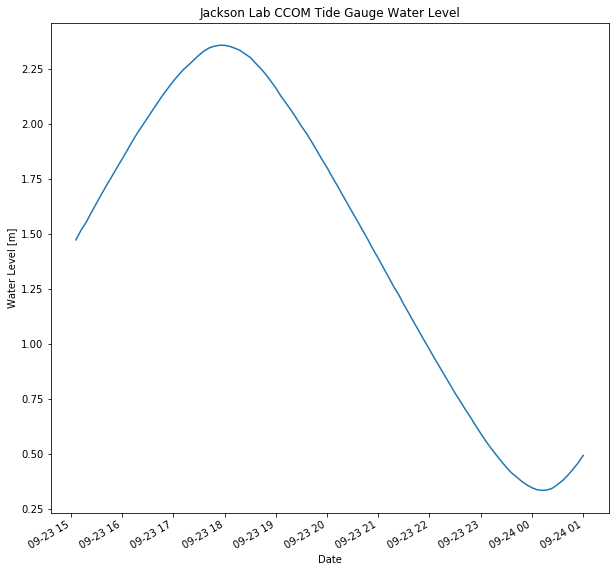

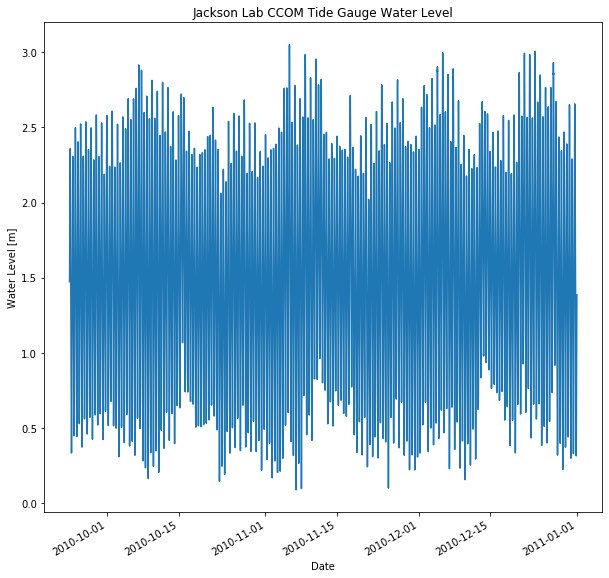

In [43]:
# 2.2 Plot the Jackson Lab data

# Plot the first 100 records
plt.figure(figsize=(10, 10))
plt.plot(t_jl[:100],wl_jl[:100])
plt.title('Jackson Lab CCOM Tide Gauge Water Level')
plt.ylabel('Water Level [m]')
plt.xlabel('Date')
plt.gcf().autofmt_xdate() # Make the x-label more readable

# Plot the entire data set
plt.figure(figsize=(10, 10))
plt.plot(t_jl,wl_jl)
plt.title('Jackson Lab CCOM Tide Gauge Water Level')
plt.ylabel('Water Level [m]')
plt.xlabel('Date')
plt.gcf().autofmt_xdate() # Make the x-label more readable

In [44]:
time_jl = mdates.date2num(t_jl)

c_jl = utide.solve(time_jl,wl_jl,lat=lat_jl,method='ols',conf_int='MC',trend=True)

print('')
print(f"{'Darwin':>9}"f"{'freq':>10}",f"{'Amp':>9}",f"{'95ci%':>9}",f"{'phase':>9}",f"{'95ci%':>9}",f"{'SNR':>9}")
for idx, const in enumerate( c_jl.name):
    print("%9s% 10.4f% 10.4f% 10.4f% 10.2f% 10.2f% 10.2f" \
          %(const, c_jl.aux.frq[idx], c_jl.A[idx],c_jl.A_ci[idx],c_jl.g[idx],c_jl.g_ci[idx],c_jl.diagn['SNR'][idx]))
    

solve: matrix prep ... solution ... diagnostics ... done.

   Darwin      freq       Amp     95ci%     phase     95ci%       SNR
       M2    0.0805    0.9226    0.0066    165.87      0.42  74145.02
       N2    0.0790    0.1725    0.0057    131.31      2.09   3562.75
       K1    0.0418    0.1189    0.0065    236.27      2.41   1277.91
       S2    0.0833    0.1039    0.0058    198.82      3.53   1254.04
       L2    0.0820    0.0992    0.0059    196.87      4.01   1083.92
       O1    0.0387    0.0855    0.0054    224.03      3.55    953.67
       MM    0.0015    0.0398    0.0297     92.61     43.68      6.89
      MU2    0.0777    0.0394    0.0065    268.58      8.21    139.11
       M6    0.2415    0.0378    0.0026    136.06      3.67    840.63
      MSF    0.0028    0.0252    0.0264     84.87     72.28      3.52
     2MN6    0.2400    0.0202    0.0024     96.29      8.33    269.85
      MO3    0.1192    0.0131    0.0010    271.04      5.34    702.11
     EPS2    0.0762    0.0127  

In [45]:
# Predict the tides using the outcome of the tidal analysis
tide_jl = utide.reconstruct(time_jl, c_jl)

prep/calcs ... done.


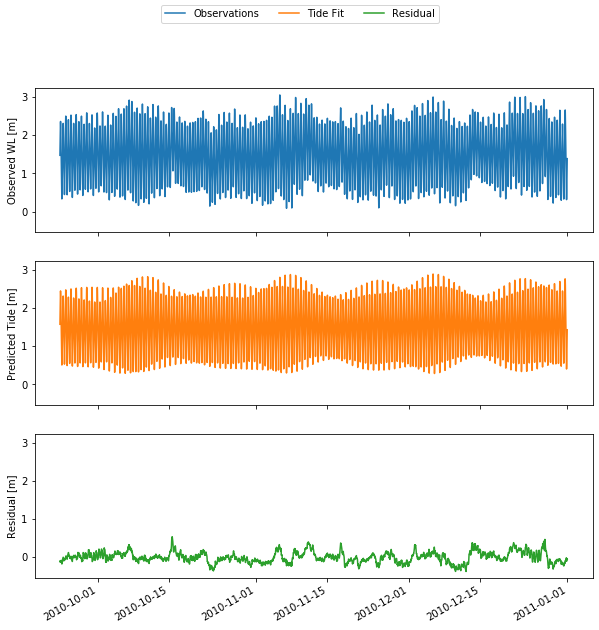

In [46]:


fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, sharey=True, sharex=True,figsize=(10, 10))

ax0.plot(t_jl, wl_jl, label=u'Observations', color='C0')
ax0.set_ylabel('Observed WL [m]')
ax1.plot(t_jl, tide_jl.h, label=u'Tide Fit', color='C1')
ax1.set_ylabel('Predicted Tide [m]')
ax2.plot(t_jl, wl_jl - tide_jl.h, label=u'Residual', color='C2')
ax2.set_ylabel('Residual [m]')
ax2.xaxis_date()
fig.legend(ncol=3, loc='upper center')
fig.autofmt_xdate()

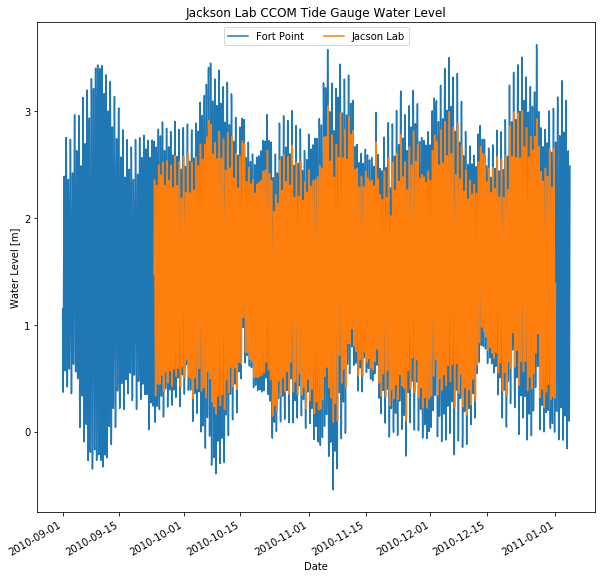

In [47]:
# Plot tide comparison
# Plot the entire data set
plt.figure(figsize=(10, 10))
plt.plot(t_fp,wl_fp,label=u'Fort Point')
plt.plot(t_jl,wl_jl,label=u'Jacson Lab')
plt.title('Jackson Lab CCOM Tide Gauge Water Level')
plt.ylabel('Water Level [m]')
plt.xlabel('Date')
plt.gcf().autofmt_xdate() # Make the x-label more readable
plt.legend(ncol=2, loc='upper center')
plt.show()


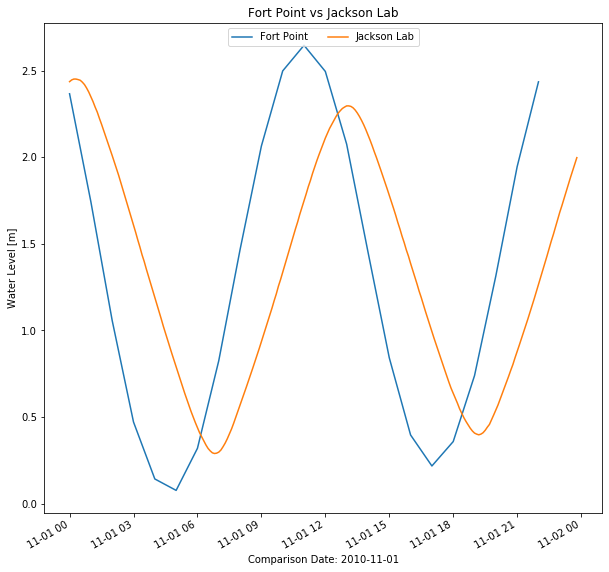

In [48]:
# Show subset of one day of both timeseries

comp_date = date(2010,11,1)
idx_fp_s = -1
idx_fp_e = 0
idx_jl_s = -1
idx_jl_e = 0
for idx, t in enumerate(t_fp):
    if t.date()==comp_date:
        if idx_fp_s == -1:
            idx_fp_s = idx
        else:
            idx_fp_e = idx
            
for idx, t in enumerate(t_jl):
    if t.date()==comp_date:
        if idx_jl_s == -1:
            idx_jl_s = idx
        else:
            idx_jl_e = idx
# Plot tide comparison
# Plot the entire data set
plt.figure(figsize=(10, 10))
plt.plot(t_fp[idx_fp_s:idx_fp_e],wl_fp[idx_fp_s:idx_fp_e],label=u'Fort Point')
plt.plot(t_jl[idx_jl_s:idx_jl_e],wl_jl[idx_jl_s:idx_jl_e],label=u'Jackson Lab')
plt.title('Fort Point vs Jackson Lab')
plt.ylabel('Water Level [m]')
plt.xlabel('Comparison Date: '+str(comp_date))
plt.gcf().autofmt_xdate() # Make the x-label more readable    
plt.legend(ncol=2, loc='upper center')
plt.show()

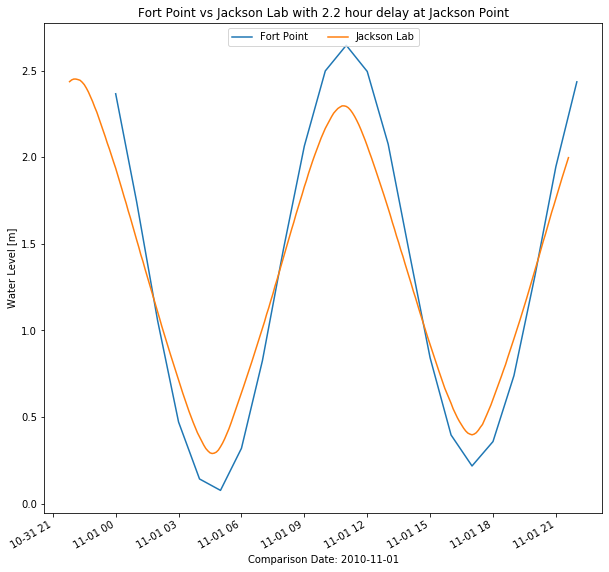

In [49]:
# Apply 2.2 hour time shift
t_s = t_jl.copy()
for idx in range(0,len(t_jl)):
    t_s[idx] = t_s[idx] - timedelta(hours=2.2)

plt.figure(figsize=(10, 10))
plt.plot(t_fp[idx_fp_s:idx_fp_e],wl_fp[idx_fp_s:idx_fp_e],label=u'Fort Point')
plt.plot(t_s[idx_jl_s:idx_jl_e],wl_jl[idx_jl_s:idx_jl_e],label=u'Jackson Lab')
plt.title('Fort Point vs Jackson Lab with 2.2 hour delay at Jackson Point')
plt.ylabel('Water Level [m]')
plt.xlabel('Comparison Date: '+str(comp_date))
plt.gcf().autofmt_xdate() # Make the x-label more readable    
plt.legend(ncol=2, loc='upper center')
plt.show()

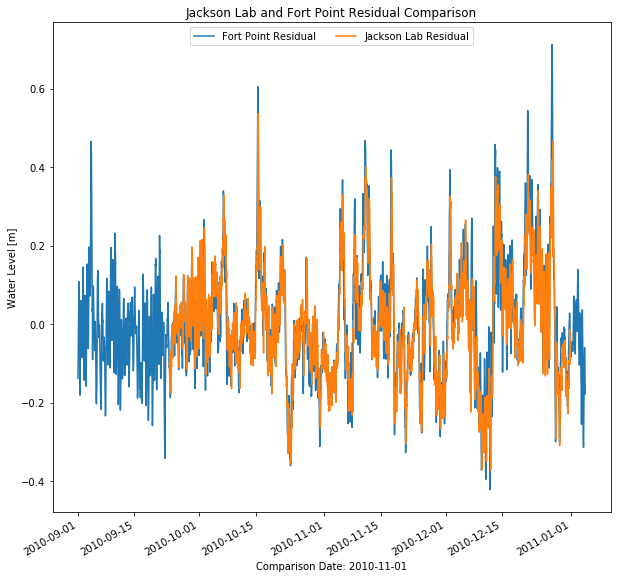

In [50]:
# Now let's compare residual data
plt.figure(figsize=(10, 10))
plt.plot(t_fp, wl_fp - tide_fp.h, label=u'Fort Point Residual', color='C0')
plt.plot(t_jl, wl_jl - tide_jl.h, label=u'Jackson Lab Residual', color='C1')

plt.title('Jackson Lab and Fort Point Residual Comparison')
plt.ylabel('Water Level [m]')
plt.xlabel('Comparison Date: '+str(comp_date))
plt.gcf().autofmt_xdate() # Make the x-label more readable    
plt.legend(ncol=2, loc='upper center')
plt.show()

     Number of blocks in transform = 1.0
     *** transforming ***
     *** Smoothing ***
['     NUMBER OF SMOOTHED POINTS  = 267']


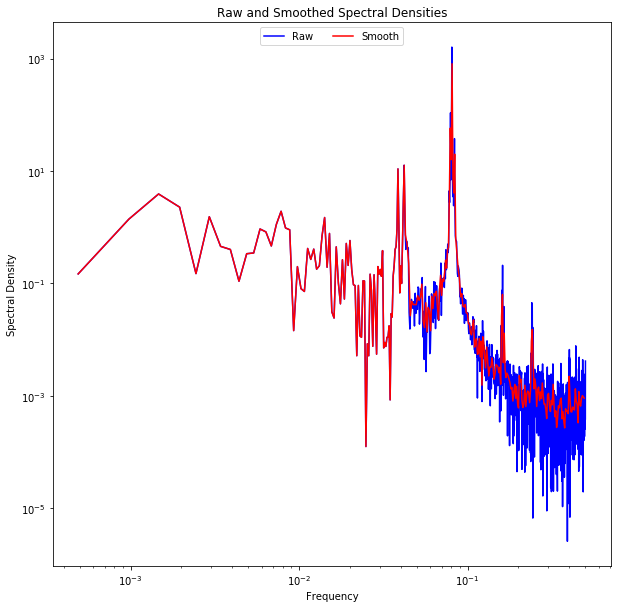

In [51]:
spec_fp = specter(wl_fp,2**11,1,.005) 

     Number of blocks in transform = 2.0
     *** transforming ***
     *** Smoothing ***
['     NUMBER OF SMOOTHED POINTS  = 385']


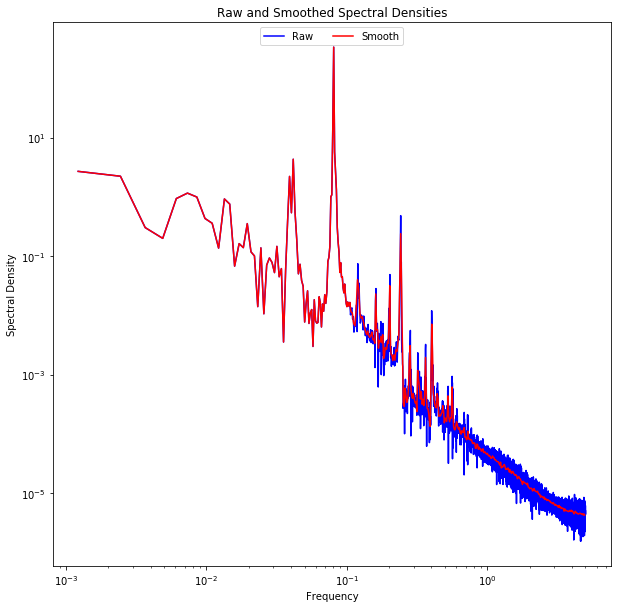

In [52]:
spec_jl = specter(wl_jl,2**13,.1,.005) 

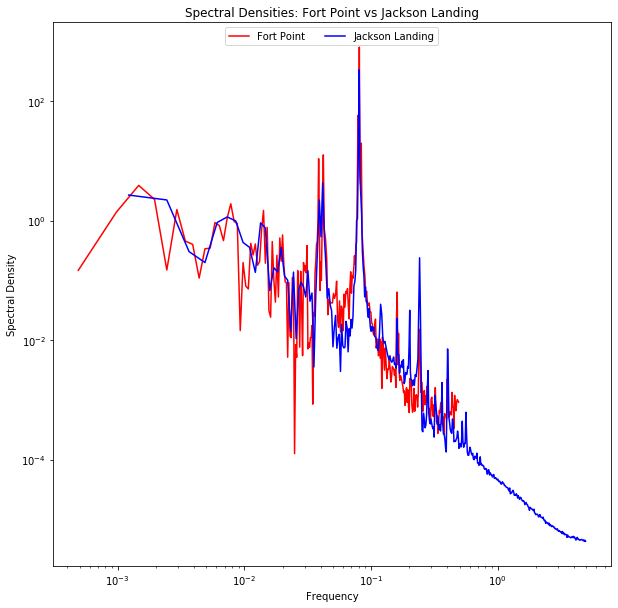

In [53]:
# Compare the spectra

plt.figure(figsize=(10, 10))
plt.loglog(spec_fp[:,0],spec_fp[:,1],'r',label=u'Fort Point')
plt.loglog(spec_jl[:,0],spec_jl[:,1],'b',label=u'Jackson Landing')
plt.title('Spectral Densities: Fort Point vs Jackson Landing')
plt.xlabel('Frequency')
plt.ylabel('Spectral Density')
plt.legend(ncol=2, loc='upper center')
plt.show()

prep/calcs ... done.


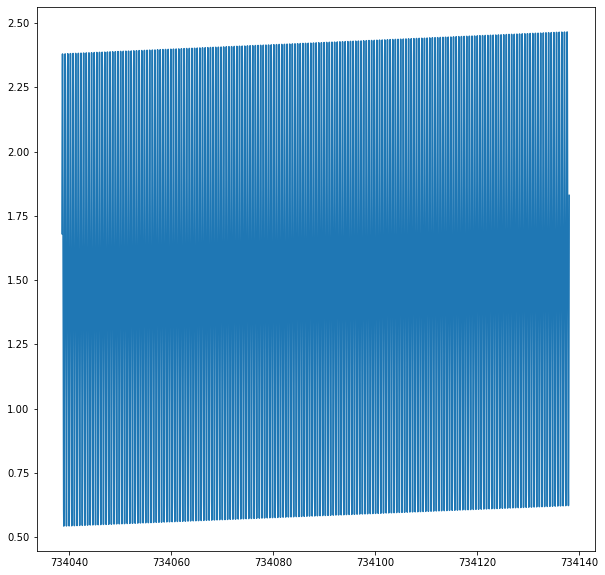

In [54]:
# make prediction for 5 most significant constituents at Fort Point

plt.figure(figsize=(10, 10))
pred_O1_jl = utide.reconstruct(time_jl, c_jl,constit='M2')
#(fpdn,nam(6,:),freq(6),fpcon(6,:),'latitude',43.07);
# K1pred=utide.reconstruct(fpdn,nam(8,:),freq(8),fpcon(8,:),'latitude',43.07);
# N2pred=utide.reconstruct(fpdn,nam(4,:),freq(14),fpcon(14,:),'latitude',43.07);
# M2pred=utide.reconstruct(fpdn,nam(15,:),freq(15),fpcon(15,:),'latitude',43.07);
# S2pred=utide.reconstruct(fpdn,nam(17,:),freq(17),fpcon(17,:),'latitude',43.07);

plt.plot(time_jl,pred_O1_jl.h)

In [67]:
# time_jl = mdates.date2num(t_jl)
idx = c_jl.name=='M2'
c_jl.aux.frq[idx]
for t in time_jl:
    M2_pred = c_jl.A[idx]*sin(2*pi*c_jl.aux.frq*t+c_jl.g)

plot(t_jl,M2)

In [71]:
x = 71*pi/180
print(sin(x-pi/2))
print(cos(x))

-0.3255681544571567
0.32556815445715676
